In [1]:
import pandas as pd
import numpy as np

In [18]:
import os
import tarfile
from six.moves import urllib

In [ ]:
#Follow the below code to download the file to the current working directoy
# the code has some error , check it later
# As of now import the data from kaggle

In [19]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [20]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [21]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [24]:
print(os.getcwd())

C:\Users\00423S744\Desktop\Geek\Python\Practice


In [25]:
housing=pd.read_csv('housing.csv')

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

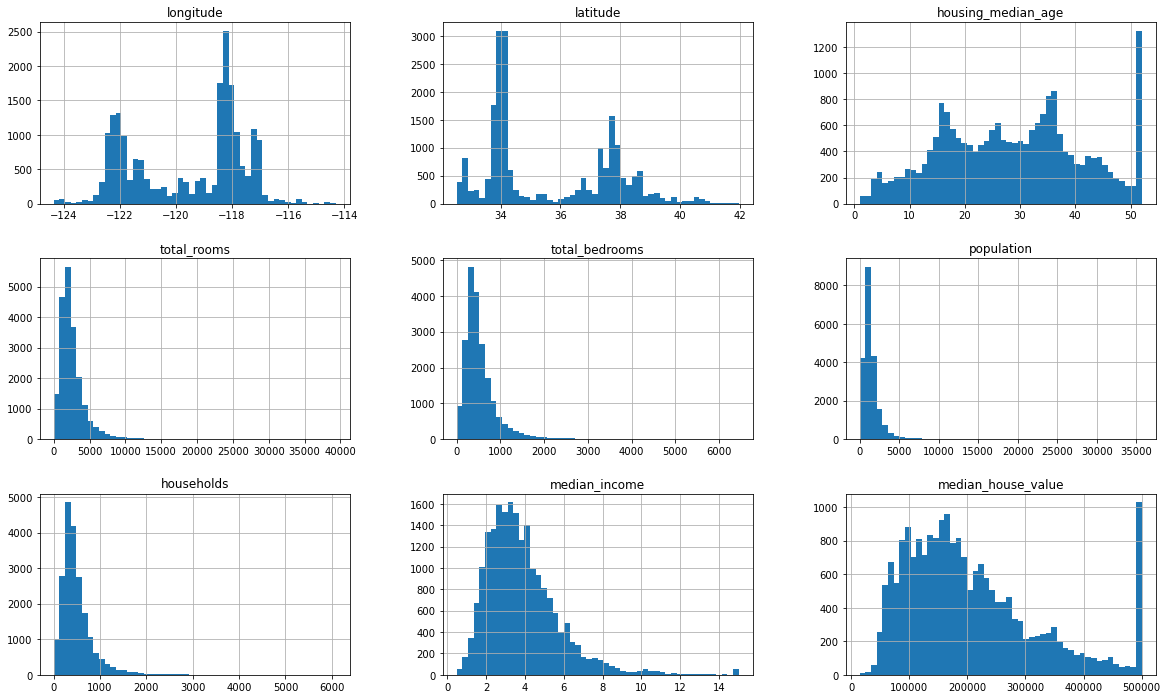

In [29]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,12))
plt.show()

In [30]:
# random sampling
from sklearn.model_selection import train_test_split

In [31]:
train_set, test_set= train_test_split(housing, test_size=0.2,random_state=42)

In [33]:
import numpy as np

In [34]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

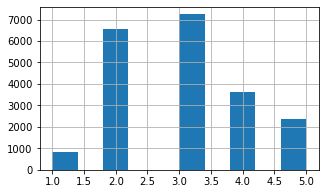

In [37]:
housing["income_cat"].hist(figsize=(5,3))
plt.show()

In [ ]:
# stratified sampling split is a type where the sample represents the exact population in num
# 51.3% male and 48.7% female

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [39]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [42]:
strat_test_set.drop("income_cat",axis=1,inplace=True)

In [43]:
strat_train_set.drop("income_cat",axis=1,inplace=True)

In [ ]:
# the above done using the for loop
# for set_ in (strat_train_set, strat_test_set):
# set_.drop("income_cat", axis=1, inplace=True)

In [48]:
# The conclusion is stratified sampling is more accurate(less skewed compared to the random sampling-Fig 2-10)

In [49]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

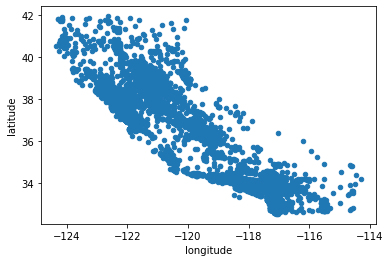

In [50]:
#scatter plot of the latitude vs longitide gives the geagraphical shape itself
housing.plot(kind='scatter',x='longitude',y='latitude')

In [53]:
# more play in the same plot

""""Now let’s look at the housing prices (Figure 2-13). The radius of each circle
represents the district’s population (option s), and the color represents the
price (option c). We will use a predefined color map (option cmap) called
jet, which ranges from blue (low values) to red (high prices):
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
Figure 2-13. California housing prices
This image tells you that the housing prices are very much related to the
location (e.g., close to the ocean) and to the population density, as you
probably knew already. It will probably be useful to use a clustering
algorithm to detect the main clusters, and add new features that measure the
proximity to the cluster centers. The ocean proximity attribute may be
useful as well, although in Northern California the housing prices in coastal
districts are not too high, so it is not a simple rule.
"""

'"Now let’s look at the housing prices (Figure 2-13). The radius of each circle\nrepresents the district’s population (option s), and the color represents the\nprice (option c). We will use a predefined color map (option cmap) called\njet, which ranges from blue (low values) to red (high prices):\nhousing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,\ns=housing["population"]/100, label="population", figsize=(10,7),\nc="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,\n)\nplt.legend()\nFigure 2-13. California housing prices\nThis image tells you that the housing prices are very much related to the\nlocation (e.g., close to the ocean) and to the population density, as you\nprobably knew already. It will probably be useful to use a clustering\nalgorithm to detect the main clusters, and add new features that measure the\nproximity to the cluster centers. The ocean proximity attribute may be\nuseful as well, although in Northern California the housing prices in c

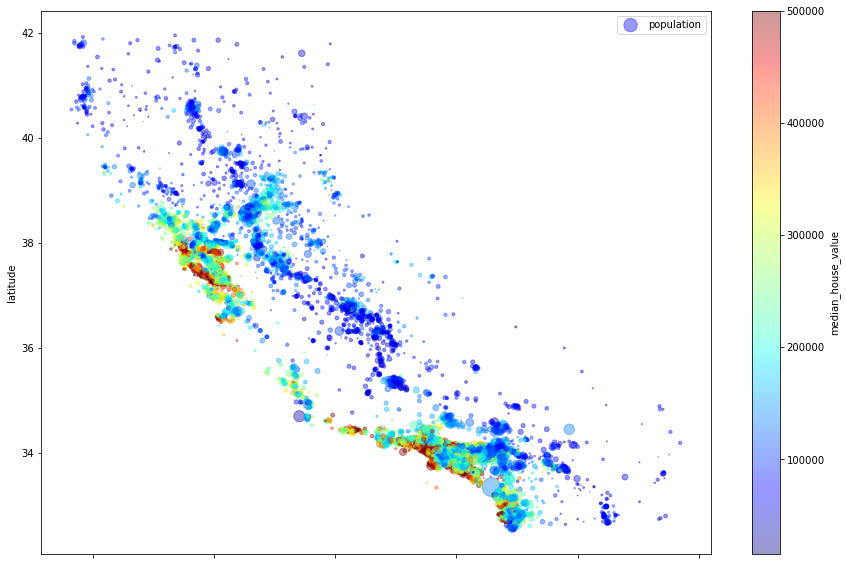

In [55]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(15,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [56]:
#Pearson correlation coefficient for numerical features
corr_matrix=housing.corr()

In [57]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [62]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [64]:
housing_labels.info()

<class 'pandas.core.series.Series'>
Int64Index: 16512 entries, 12655 to 19773
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB


In [73]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [78]:
housing['total_bedrooms'].isnull().sum()/housing['total_bedrooms'].count()*100

0.9661244955362602

In [79]:
# dealing with missing values 1. drop coloumn, dropna-rows, filling with median values

# here we choose fillin with median values

In [83]:
median=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

In [84]:
# to replace many features with median value use IMputer estimator from Scikit-learn(Page 96)
# IMputer is useful when we use live modelling whenever the new data is having null value it will replce with median value

In [85]:
housing['total_bedrooms'].isnull().sum()

0

In [86]:
#Scikit-learn Design principles(check page 98- totally 15)

# Consistency- estimators(Imputer), Transformers, predictors

# Inspection_ estomator_statistics_

In [87]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [91]:
housing_cat=housing["ocean_proximity"]
housing_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [93]:
housing_cat_encoded,housing_categories=housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2], dtype=int64)

In [95]:
housing_cat_encoded

array([0, 1, 0, ..., 2, 2, 0], dtype=int64)

In [96]:
from sklearn.preprocessing import OneHotEncoder
>>> encoder = OneHotEncoder()
>>> housing_cat_1hot =encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
>>> housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [97]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

NameError: name 'Imputer' is not defined